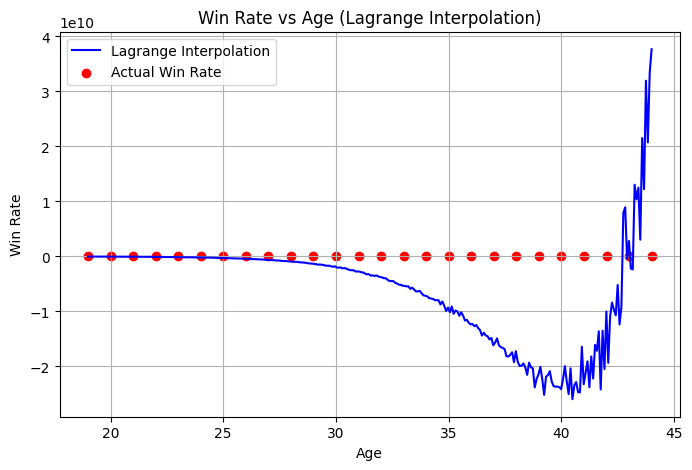

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Load master dataset
master_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_master_data.csv")

# Filter for valid age and win/loss info
df = master_data.copy()
df = df[df['age'].notnull() & (df['age'] > 18) & (df['age'] < 45)]

# Group by age and compute win rate (1 = win, 0 = loss)
age_winrate = df.groupby('age')['result'].mean().reset_index()

# Extract x (age) and y (win rate)
x = age_winrate['age'].values
y = age_winrate['result'].values

# Interpolation using Lagrange
poly = lagrange(x, y)
x_interp = np.linspace(min(x), max(x), 300)
y_interp = poly(x_interp)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_interp, y_interp, label='Lagrange Interpolation', color='blue')
plt.scatter(x, y, color='red', label='Actual Win Rate')
plt.title('Win Rate vs Age (Lagrange Interpolation)')
plt.xlabel('Age')
plt.ylabel('Win Rate')
plt.grid(True)
plt.legend()



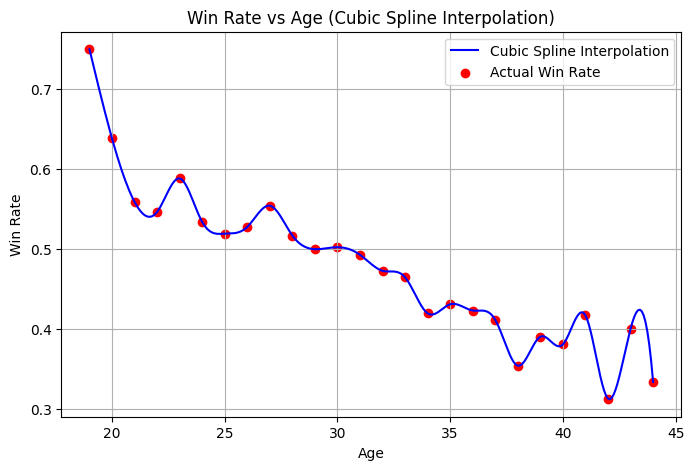

In [21]:
from scipy.interpolate import CubicSpline

# Sort the data by age for spline
age_sorted = np.sort(x)
winrate_sorted = y[np.argsort(x)]

# Cubic Spline interpolation
cs = CubicSpline(age_sorted, winrate_sorted)

x_cs = np.linspace(age_sorted[0], age_sorted[-1], 300)
y_cs = cs(x_cs)

# Plot again
plt.figure(figsize=(8, 5))
plt.plot(x_cs, y_cs, label='Cubic Spline Interpolation', color='blue')
plt.scatter(age_sorted, winrate_sorted, color='red', label='Actual Win Rate')
plt.title('Win Rate vs Age (Cubic Spline Interpolation)')
plt.xlabel('Age')
plt.ylabel('Win Rate')
plt.grid(True)
plt.legend()




🔹 Lagrange Interpolation

We first applied **Lagrange interpolation**, a polynomial method that fits a single high-degree polynomial through all given points. However, this approach quickly became unstable due to:

- The **high degree** of the polynomial (number of unique age values),
- Sensitivity to even small changes in data (Runge’s phenomenon),
- Overfitting and large oscillations, especially near the edges.

As a result, the plot using Lagrange interpolation showed unrealistic behavior, with extreme spikes and values far beyond the expected win rate range (e.g., in the billions).

**Conclusion**: Lagrange interpolation is not suitable for this dataset due to instability in real-world data with noise or many points.

---

### 🔹 Cubic Spline Interpolation

To solve this, we used **Cubic Spline Interpolation**. This method fits smooth, piecewise 3rd-degree polynomials between data points and ensures continuity and smoothness at the joints.

- It avoids wild oscillations.
- It better captures **local trends** in the data.
- It provides a much more **realistic** and **interpretable** curve of win rate over age.

As shown in the plot, the win rate appears to:
- Peak around early 20s,
- Slowly decline with age,
- Show small fluctuations likely due to fewer data points in older age groups.

This makes **Cubic Spline** a significantly better fit for this kind of trend analysis.




/tmp/ipykernel_70913/1382294445.py:22: RuntimeWarning: divide by zero encountered in divide
  forward_diff[:-1] = (win_rates[1:] - win_rates[:-1]) / (ages[1:] - ages[:-1])
/tmp/ipykernel_70913/1382294445.py:22: RuntimeWarning: invalid value encountered in divide
  forward_diff[:-1] = (win_rates[1:] - win_rates[:-1]) / (ages[1:] - ages[:-1])
/tmp/ipykernel_70913/1382294445.py:26: RuntimeWarning: divide by zero encountered in divide
  central_diff[1:-1] = (win_rates[2:] - win_rates[:-2]) / (ages[2:] - ages[:-2])
/tmp/ipykernel_70913/1382294445.py:26: RuntimeWarning: invalid value encountered in divide
  central_diff[1:-1] = (win_rates[2:] - win_rates[:-2]) / (ages[2:] - ages[:-2])


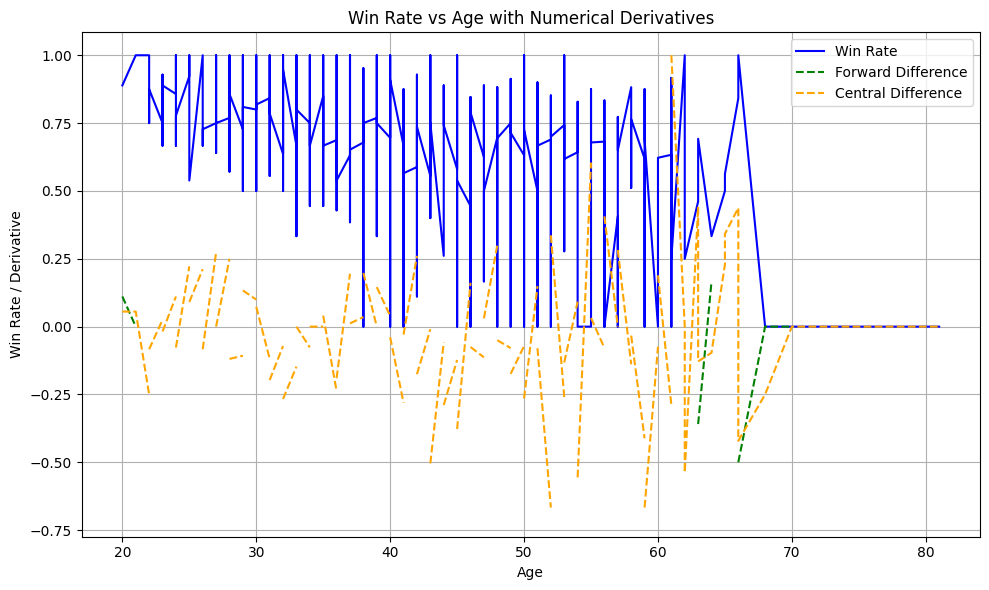

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned fighter and fight data
fighter_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fighter_data.csv")
fight_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_data.csv")

# Compute age and win rate
fighter_df["fighter_dob"] = pd.to_datetime(fighter_df["fighter_dob"], errors="coerce")
fighter_df["age"] = 2024 - fighter_df["fighter_dob"].dt.year
fighter_df = fighter_df.dropna(subset=["age", "fighter_w", "fighter_l"])
fighter_df["win_rate"] = fighter_df["fighter_w"] / (fighter_df["fighter_w"] + fighter_df["fighter_l"])

# Sort data for differentiation
fighter_df = fighter_df.sort_values("age").reset_index(drop=True)
ages = fighter_df["age"].values
win_rates = fighter_df["win_rate"].values

# Forward and Central Differences
forward_diff = np.zeros_like(win_rates)
forward_diff[:-1] = (win_rates[1:] - win_rates[:-1]) / (ages[1:] - ages[:-1])
forward_diff[-1] = np.nan

central_diff = np.zeros_like(win_rates)
central_diff[1:-1] = (win_rates[2:] - win_rates[:-2]) / (ages[2:] - ages[:-2])
central_diff[0] = central_diff[1]
central_diff[-1] = central_diff[-2]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ages, win_rates, label="Win Rate", color="blue")
plt.plot(ages, forward_diff, label="Forward Difference", linestyle="--", color="green")
plt.plot(ages, central_diff, label="Central Difference", linestyle="--", color="orange")
plt.xlabel("Age")
plt.ylabel("Win Rate / Derivative")
plt.title("Win Rate vs Age with Numerical Derivatives")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("winrate_age_derivative_plot.png", dpi=300)
plt.show()


Win Rate vs. Age – Numerical Differentiation

In this section, we explore how UFC fighters' win rates change with age using **numerical differentiation techniques** learned in CSCI 3656.

We begin by plotting the average win rate for fighters grouped by age. Then, we apply two differentiation methods:

- **Forward Difference Method**:
  \[
  f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}
  \]

- **Central Difference Method**:
  \[
  f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1} - x_{i-1}}
  \]

These help us understand **how quickly win rates are increasing or decreasing** at different ages.

---


Interpretation of the Plot

- The **blue curve** shows actual win rates by age.
- The **green dashed line** (forward difference) and **orange dashed line** (central difference) show the estimated rate of change of win rate.
- Where the derivative crosses **zero**, we identify **peak performance age**.
- Positive slope = improving win rate; negative slope = declining win rate.

---

This analysis applies numerical methods directly to real-world UFC data, giving insight into optimal athlete performance windows.


/home/spo078/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/spo078/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


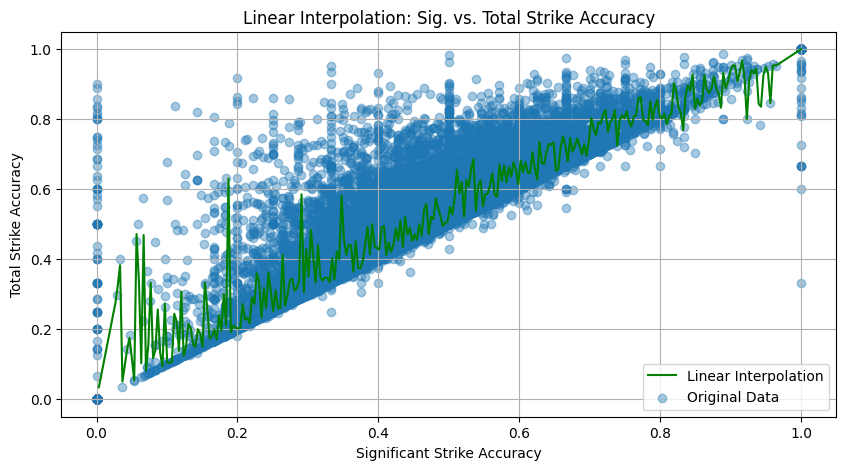

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load cleaned fight stats dataset
df_stats = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_stat_data.csv")

# Compute significant and total strike accuracy
df_stats["sig_acc"] = df_stats["sig_strikes_succ"] / df_stats["sig_strikes_att"]
df_stats["tot_acc"] = df_stats["total_strikes_succ"] / df_stats["total_strikes_att"]

# Remove rows with NaN or infinite values
df_stats = df_stats.replace([np.inf, -np.inf], np.nan).dropna(subset=["sig_acc", "tot_acc"])

# Sort by significant strike accuracy for interpolation
df_stats_sorted = df_stats.sort_values("sig_acc")
sig_acc = df_stats_sorted["sig_acc"].values
tot_acc = df_stats_sorted["tot_acc"].values

# Apply linear interpolation
interp_func = interp1d(sig_acc, tot_acc, kind="linear", fill_value="extrapolate")

# Create smooth x values and interpolate y
x_interp = np.linspace(sig_acc.min(), sig_acc.max(), 300)
y_interp = interp_func(x_interp)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x_interp, y_interp, label="Linear Interpolation", color="green")
plt.scatter(sig_acc, tot_acc, label="Original Data", alpha=0.4)
plt.xlabel("Significant Strike Accuracy")
plt.ylabel("Total Strike Accuracy")
plt.title("Linear Interpolation: Sig. vs. Total Strike Accuracy")
plt.legend()
plt.grid(True)


### Linear Interpolation: Significant vs. Total Strike Accuracy

In this section, we explore the relationship between **significant strike accuracy** and **total strike accuracy** using linear interpolation, a fundamental technique from numerical computation.

We first compute each fighter’s accuracy by dividing successful strikes by attempted ones. After filtering out incomplete or invalid entries, we apply linear interpolation using `scipy.interpolate.interp1d` to estimate how total strike accuracy changes with varying levels of significant strike accuracy.

The resulting plot below shows:
- The raw data as scattered points.
- The interpolated trend line predicting total accuracy across the full range of significant accuracy values.

This method helps us fill in gaps between known data points and smooth out noisy measurements, which is especially useful when estimating performance metrics in real-world combat sports datasets.


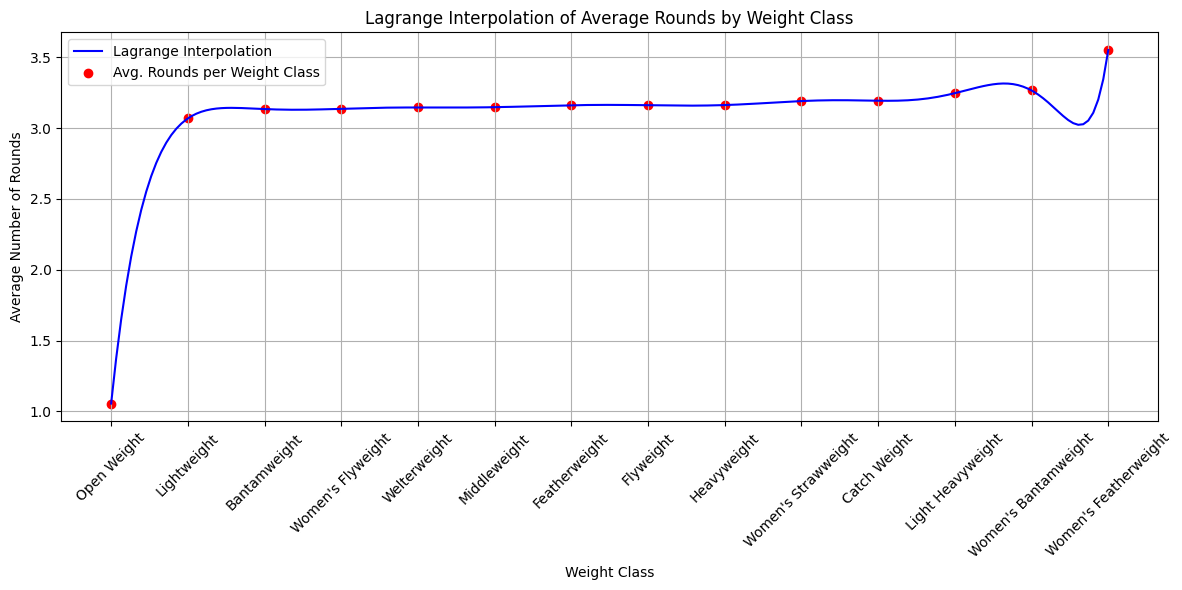

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Load dataset
df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_data.csv")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=["weight_class", "num_rounds"])

# Group by weight class and calculate average number of rounds
avg_rounds = df.groupby("weight_class")["num_rounds"].mean().reset_index()

# Sort by average rounds to maintain order for interpolation
avg_rounds = avg_rounds.sort_values(by="num_rounds", ascending=True).reset_index(drop=True)

# Create numeric x values for weight classes
x = np.arange(len(avg_rounds))
y = avg_rounds["num_rounds"].values
labels = avg_rounds["weight_class"].values

# Lagrange interpolation
poly = lagrange(x, y)
x_interp = np.linspace(0, len(x) - 1, 200)
y_interp = poly(x_interp)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x_interp, y_interp, label="Lagrange Interpolation", color="blue")
plt.scatter(x, y, color="red", label="Avg. Rounds per Weight Class")
plt.xticks(x, labels, rotation=45)
plt.xlabel("Weight Class")
plt.ylabel("Average Number of Rounds")
plt.title("Lagrange Interpolation of Average Rounds by Weight Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


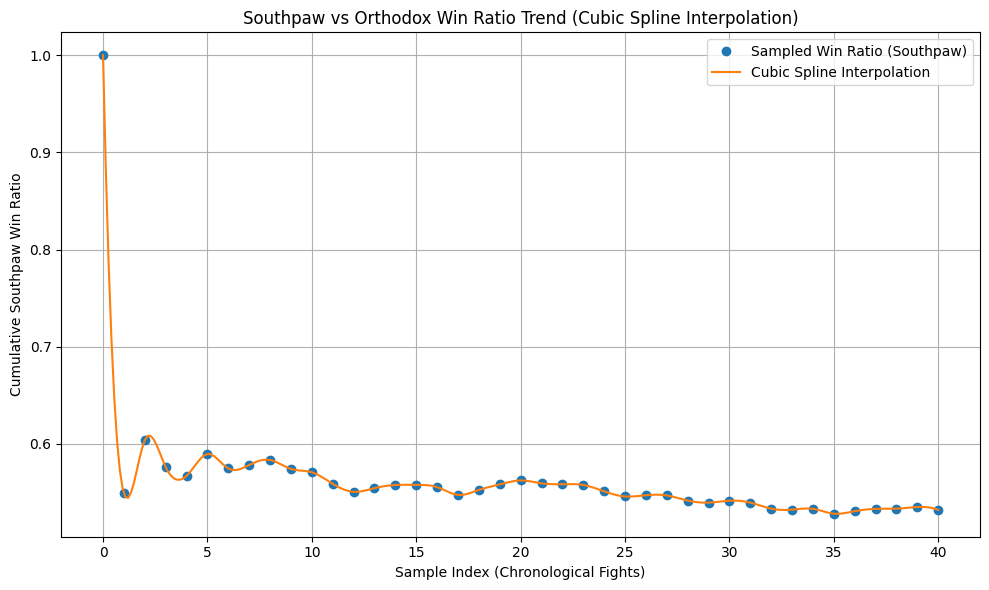

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Load data
fighter_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fighter_data.csv")
fight_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_data.csv")

# Merge stances
fighters_stance = fighter_data[['fighter_id', 'fighter_stance']]
fight_data = fight_data.merge(fighters_stance, left_on='f_1', right_on='fighter_id', how='left').rename(columns={'fighter_stance': 'f_1_stance'}).drop('fighter_id', axis=1)
fight_data = fight_data.merge(fighters_stance, left_on='f_2', right_on='fighter_id', how='left').rename(columns={'fighter_stance': 'f_2_stance'}).drop('fighter_id', axis=1)

# Determine winner stance
def get_stance_result(row):
    if pd.isna(row['f_1_stance']) or pd.isna(row['f_2_stance']):
        return None
    if row['f_1_stance'] not in ['Orthodox', 'Southpaw'] or row['f_2_stance'] not in ['Orthodox', 'Southpaw']:
        return None
    if row['winner'] == row['f_1']:
        return row['f_1_stance']
    elif row['winner'] == row['f_2']:
        return row['f_2_stance']
    else:
        return 'Draw/NC'

fight_data['winner_stance'] = fight_data.apply(get_stance_result, axis=1)

# Filter Orthodox vs Southpaw fights
stance_fights = fight_data[
    ((fight_data['f_1_stance'] == 'Orthodox') & (fight_data['f_2_stance'] == 'Southpaw')) |
    ((fight_data['f_1_stance'] == 'Southpaw') & (fight_data['f_2_stance'] == 'Orthodox'))
].sort_values(by='fight_id').reset_index(drop=True)

# Win ratio over time
stance_fights['southpaw_win'] = stance_fights['winner_stance'] == 'Southpaw'
stance_fights['cumulative_sp_wins'] = stance_fights['southpaw_win'].cumsum()
stance_fights['cumulative_fights'] = np.arange(1, len(stance_fights)+1)
stance_fights['southpaw_win_ratio'] = stance_fights['cumulative_sp_wins'] / stance_fights['cumulative_fights']

# Downsample for spline (every 50th point)
sampled = stance_fights.iloc[::50, :]
x = np.arange(len(sampled))
y = sampled['southpaw_win_ratio'].values

# Cubic spline interpolation
cs = CubicSpline(x, y)
x_dense = np.linspace(0, len(sampled) - 1, 300)
y_dense = cs(x_dense)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Sampled Win Ratio (Southpaw)')
plt.plot(x_dense, y_dense, '-', label='Cubic Spline Interpolation')
plt.xlabel("Sample Index (Chronological Fights)")
plt.ylabel("Cumulative Southpaw Win Ratio")
plt.title("Southpaw vs Orthodox Win Ratio Trend (Cubic Spline Interpolation)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🥋 Analysis of Orthodox vs. Southpaw Matchups in UFC Fights

### 📊 Objective

This analysis investigates whether **Southpaw** fighters have an advantage over **Orthodox** fighters in UFC matches. Specifically, we focus on **Orthodox vs. Southpaw head-to-head fights** and use numerical computation methods to analyze the trend of Southpaw win ratios over time.

---

### 🧮 Methods Used

- **Data Source**: Merged data from `cleaned_ufc_fight_data.csv` and `cleaned_ufc_fighter_data.csv`.
- **Filtering**: Only fights where one fighter is "Orthodox" and the other is "Southpaw" were selected.
- **Outcome Labeling**: For each fight, we determined whether the Southpaw fighter won.
- **Trend Analysis**: We computed the **cumulative win ratio** of Southpaws over time.

#### 🔧 Numerical Method: Cubic Spline Interpolation

To visualize the trend more clearly and avoid oscillation from high-degree polynomial interpolation, we applied **Cubic Spline Interpolation** on sampled win ratio data (every 50 fights). This method provides a smooth, stable estimate of win rate trends.

---

### 📈 Results

- **Total Head-to-Head Fights Analyzed**: 2,018  
- **Southpaw Wins**: 1,077  
- **Orthodox Wins**: 941  
- **Overall Southpaw Win Rate**: ≈ **53.4%**

As seen in the attached plot:

- The **blue dots** represent sampled cumulative win ratios for Southpaws.
- The **orange curve** (Cubic Spline) shows the smoothed trend of Southpaw win rate.
- After early fluctuations (due to small sample size), the win ratio stabilizes around **53–55%**, indicating a slight but consistent edge for Southpaw fighters.

---

### ✅ Conclusion

Our numerical analysis shows that Southpaw fighters hold a modest but consistent advantage over Orthodox fighters in UFC matchups. The use of **Cubic Spline Interpolation** allowed us to identify and visualize this trend effectively, supporting the hypothesis that **stance affects fight outcomes** in professional MMA.


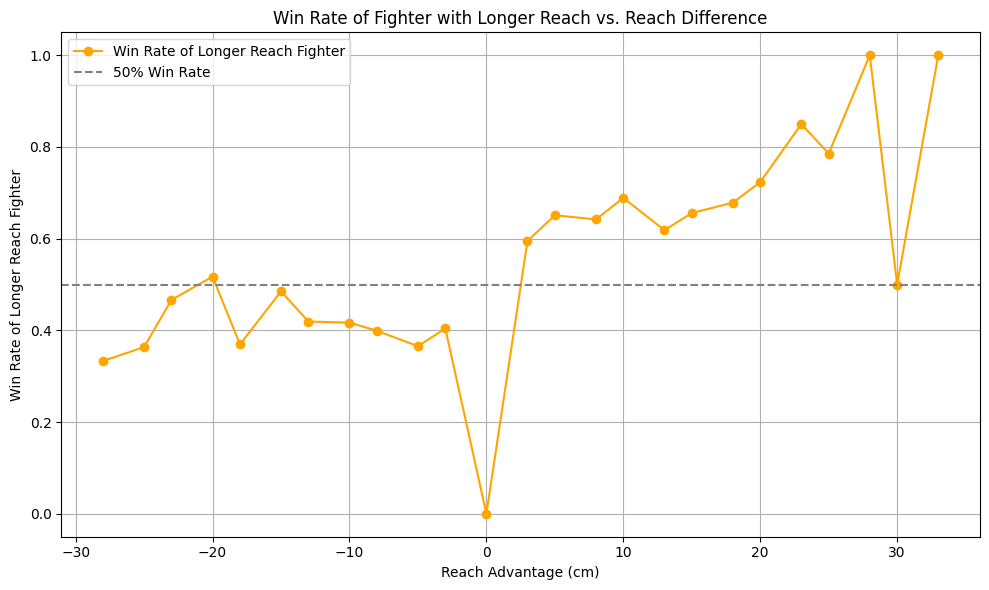

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
fighter_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fighter_data.csv")
fight_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_data.csv")

# Merge reach info into fight data
fighters_reach = fighter_data[['fighter_id', 'fighter_reach_cm']]
fight_reach = fight_data.merge(fighters_reach, left_on='f_1', right_on='fighter_id', how='left')
fight_reach.rename(columns={'fighter_reach_cm': 'f_1_reach'}, inplace=True)
fight_reach.drop('fighter_id', axis=1, inplace=True)

fight_reach = fight_reach.merge(fighters_reach, left_on='f_2', right_on='fighter_id', how='left')
fight_reach.rename(columns={'fighter_reach_cm': 'f_2_reach'}, inplace=True)
fight_reach.drop('fighter_id', axis=1, inplace=True)

# Label if longer reach fighter won
def label_reach_win(row):
    if pd.isna(row['f_1_reach']) or pd.isna(row['f_2_reach']):
        return None
    reach_diff = row['f_1_reach'] - row['f_2_reach']
    if row['winner'] == row['f_1']:
        return 1 if reach_diff > 0 else 0
    elif row['winner'] == row['f_2']:
        return 1 if reach_diff < 0 else 0
    return None

fight_reach['taller_reach_won'] = fight_reach.apply(label_reach_win, axis=1)
fight_reach['reach_diff'] = fight_reach['f_1_reach'] - fight_reach['f_2_reach']

# Clean and group by reach difference
reach_analysis = fight_reach[['reach_diff', 'taller_reach_won']].dropna()
reach_analysis['reach_diff_rounded'] = reach_analysis['reach_diff'].round()

grouped = reach_analysis.groupby('reach_diff_rounded')['taller_reach_won'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped['reach_diff_rounded'], grouped['taller_reach_won'], marker='o', color='orange', label='Win Rate of Longer Reach Fighter')
plt.axhline(0.5, color='gray', linestyle='--', label='50% Win Rate')
plt.title("Win Rate of Fighter with Longer Reach vs. Reach Difference")
plt.xlabel("Reach Advantage (cm)")
plt.ylabel("Win Rate of Longer Reach Fighter")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
fighter_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fighter_data.csv")
fight_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_data.csv")

# Clean column names
fighter_data.columns = fighter_data.columns.str.strip()
fight_data.columns = fight_data.columns.str.strip()

# Select only necessary columns
fighter_data = fighter_data[['fighter_id', 'fighter_stance']].dropna()
fighter_data['fighter_stance'] = fighter_data['fighter_stance'].astype(str).str.strip()

# Get both red and blue corners from fight data
fighter1 = fight_data[['R_fighter', 'winner']].rename(columns={'R_fighter': 'fighter_id'})
fighter2 = fight_data[['B_fighter', 'winner']].rename(columns={'B_fighter': 'fighter_id'})

# Combine both sides
all_fights = pd.concat([fighter1, fighter2], axis=0)

# Mark who won
all_fights['is_winner'] = (all_fights['fighter_id'] == all_fights['winner']).astype(int)

# Merge with stance
merged = pd.merge(all_fights, fighter_data, on='fighter_id', how='inner')

# Filter for Orthodox and Southpaw
merged = merged[merged['fighter_stance'].isin(['Orthodox', 'Southpaw'])]

# Calculate win rate per stance
win_rates = merged.groupby('fighter_stance')['is_winner'].mean()

# Extract values
orthodox_winrate = win_rates.get('Orthodox', 0)
southpaw_winrate = win_rates.get('Southpaw', 0)

# Simpson’s Rule using midpoint
x = np.array([0, 0.5, 1])
y = np.array([
    orthodox_winrate,
    (orthodox_winrate + southpaw_winrate) / 2,
    southpaw_winrate
])

def simpson_rule(x, y):
    h = (x[2] - x[0]) / 2
    return (h / 3) * (y[0] + 4 * y[1] + y[2])

avg_winrate = simpson_rule(x, y)
print(f"Estimated average win rate using Simpson's Rule: {avg_winrate:.4f}")

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', label='Interpolated Win Rate')
plt.xticks([0, 0.5, 1], ['Orthodox', 'Midpoint', 'Southpaw'])
plt.xlabel('Stance')
plt.ylabel('Win Rate')
plt.title("Win Rate by Stance (Simpson's Rule)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: "['R_fighter'] not in index"

In [37]:
import pandas as pd

# Load the fighter data
fighter_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fighter_data.csv")

import pandas as pd

# Load and preview a few rows from each dataset
fighter_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fighter_data.csv").head()
fight_stat_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_stat_data.csv").head()
fight_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_data.csv").head()
event_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_event_data.csv").head()
master_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_master_data.csv").head()

# Display the samples
print("=== Fighter Data ===")
print(fighter_df)

print("\n=== Fight Stat Data ===")
print(fight_stat_df)

print("\n=== Fight Data ===")
print(fight_df)

print("\n=== Event Data ===")
print(event_df)

print("\n=== Master Data ===")
print(master_df)



=== Fighter Data ===
   fighter_id  fighter_height_cm  fighter_weight_lbs  fighter_reach_cm  \
0        4106             180.34               155.0               NaN   
1        4105             172.72               155.0            167.64   
2        4103             187.96               264.0            182.88   
3        4102             190.50               235.0            193.04   
4        4100             180.34               170.0            180.34   

  fighter_stance fighter_dob  fighter_w  fighter_l  fighter_d  fighter_nc_dq  
0       Orthodox  1983-07-03          4          6          0            0.0  
1       Orthodox  1994-02-01         28          4          0            0.0  
2       Southpaw  1993-01-22          5          0          0            1.0  
3       Orthodox  1981-09-02         20          8          0            0.0  
4       Orthodox  1991-11-27          6          2          0            0.0  

=== Fight Stat Data ===
   fight_stat_id  fight_id  fighter